In [40]:
import mpl_toolkits.mplot3d.axes3d as p3
from scipy import stats
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size 
import matplotlib.font_manager
from matplotlib.patches import PathPatch


In [41]:
#Credits for functions used below : Emanuele Petretto, Vanni Lab 

def find_cog(obj):
    xyz_mean=0
    x = [p[0] for p in obj]
    y = [p[1] for p in obj]
    z = [p[2] for p in obj]
    x_mean = sum(x) / len(obj)
    y_mean = sum(y) / len(obj)
    z_mean = sum(z) / len(obj)
    xyz_mean = [x_mean,y_mean,z_mean]

    return xyz_mean

def move_to_centre(obj,centre):
        x = obj[0]-centre[0]
        y = obj[1]-centre[1]
        z = obj[2]-centre[2]
        return [x,y,z]
    
def car2sphe(xyz):
  
    XY = xyz[0]**2 + xyz[1]**2
    r = np.sqrt(XY + xyz[2]**2)               # r
    theta = np.arctan2(xyz[2],np.sqrt(XY))     # theta
    phi = np.arctan2(xyz[1],xyz[0])     
    return [r,theta,phi]


def project(xyz,radius):
    atoms_dot = []
    atoms_hat_list = []
    new_atoms = [.0,.0,.0]
    new_atoms_list = []
    for i in range (0,len(xyz)):
        
        atoms_temp = xyz[i]
        atoms_dot_temp = np.dot(atoms_temp, atoms_temp) #clean atoms list
        atoms_dot.append(atoms_dot_temp)

        distance = np.sqrt(atoms_dot_temp)
        atoms_hat = []
        for k in range(0,3):
            print(k)
            #print(atoms[i])
            atoms_hat_coord = xyz[i][k] /distance\
        
            #print(xyz[i][k])
            atoms_hat.append(atoms_hat_coord)
        atoms_hat_list.append(atoms_hat)

    for i in range (0, len(xyz)):
        new_atoms[0] = round((atoms_hat_list[i][0] * radius),3)#, * np.sqrt(rad)), 3)
        new_atoms[1] = round((atoms_hat_list[i][1] * radius),3)# * np.sqrt(rad)), 3)
        new_atoms[2] = round((atoms_hat_list[i][2] * radius),3)# * np.sqrt(rad)), 3)


        new_dot = np.dot(new_atoms, new_atoms)
        new_distance = np.sqrt(new_dot)
        print(new_distance)

        new_atoms_list.append(new_atoms)
    return atoms_hat_list


def car2geo(xyz):
    XY = xyz[0]**2 + xyz[1]**2
    r = np.sqrt(XY + xyz[2]**2)               # r
    theta = np.arctan2(xyz[2],np.sqrt(XY))     # theta
    phi = np.arctan2(xyz[1],xyz[0])                           # phi


    latitude = ((theta * (180 / np.pi))+90)%180
    longitude = ((phi * (180 / np.pi))+180)%360
    return [longitude,latitude, r]


def bin(xyz,bin_min,bin_max):
   # rtp=[]
    #xyz=xyz
    select=[]
    r = np.sqrt( xyz[0]**2 + xyz[1]**2 + xyz[2]**2 )

    if bin_min <= r <= bin_max:
        return xyz

        


def get_numbers_from_filename(filename):
    return re.search(r'\d+', filename).group(0)        
        

    
from pylab import cross,dot,inv

def rot(U,V):
    W=cross(U,V)
    A=np.array([U,W,cross(U,W)]).T
    B=np.array([V,W,cross(V,W)]).T
    return dot(B,inv(A))

def load_data(filename):
    df = pd.read_csv (filename, sep ='\s+', header=None)
    df.columns =['atom', 'na', 'restype','resname','a','resn','x','y','z','index','b_value','c'] 
    coordinates =   np.array(df[['x','y','z']])
    b_value =   np.array(df[['b_value']])
    resn =   np.array(df[['resn']])
    resname =   np.array(df[['resname']])
    return coordinates, b_value, resn


def convert2geo(coordinates):
    rtp=[]
    for i in range(0,len(coordinates)):
        rtp.append(car2sphe(coordinates[i]))
    rtp_array=np.array(rtp)
    sum_matrix = rtp_array.sum(axis=0)
    radius=sum_matrix[0]/len(rtp)
    centred_atoms=[]
    for i in range(0,len(coordinates)):
        centred_atoms.append(move_to_centre(coordinates[i],com))
    geo=[]
    for i in range(0,len(centred_atoms)):
        geo.append(car2geo(centred_atoms[i]))
    return geo

def extract_pairs_greater_than_threshold(x_values, y_values, threshold, output_file):
    pairs = []
    for x, y in zip(x_values, y_values):
        if y > threshold:
            pairs.append((x, y))
    
    with open(output_file, 'w') as file:
        #file.write("Pairs with y-values greater than {}:\n".format(threshold))
        for pair in pairs:
            file.write("{} {}\n".format(pair[0], pair[1]))

In [42]:
def read_xvg(fname):
    data=[]
    with open(fname) as f:
        for line in f:
            if not line.startswith(("@","#")):
                data.append(np.array([float(s) for s in line.split()]))
    data=np.vstack(data)
    return data

In [43]:
data = read_xvg("rmsf_gramd1a.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
for i in range(10):
    rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
for i in range(3):
    rmsf_asterc.append(0)  

In [44]:
prot='astera'

filename='astera_resnr1_betafactor_membranebinding_CA.pdb'
filename2='astera_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [45]:
#x is an array with the residue numbers
#scaled_z is the normalized membr binding frequency
#scalez_y is the normalized contribution to PC1
bound = []
nbound = []

t = 0.3

for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# import numpy as np

# # Calculate mean and standard deviation
# mean_value = np.mean(bound)
# std_deviation = np.std(bound)

# print(f"Mean: {mean_value}")
# print(f"Standard Deviation: {std_deviation}")

# # Calculate mean and standard deviation
# nmean_value = np.mean(nbound)
# nstd_deviation = np.std(nbound)

# print(f"Mean: {nmean_value}")
# print(f"Standard Deviation: {nstd_deviation}")

# print (f"The mean value of the binding residues is {mean_value / nmean_value:.4f} larger than the one of non-binding residues")

In [46]:
from scipy.stats import mannwhitneyu

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


Wilcoxon Rank-Sum Statistic: 582.0
P-value: 5.3344683268839724e-05
Reject the null hypothesis: There is a significant difference between the groups.


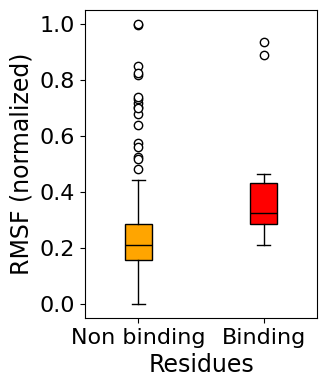

In [47]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

size=17

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))
# plt.title('GRAMD1A')

plt.xlim([0.7,2.0])

plt.savefig("bp_large_gramd1a_rmsf.png",dpi=500,bbox_inches="tight")

In [48]:
prot='asterc'

filename='asterc_resnr1_betafactor_membranebinding_CA.pdb'
filename2='asterc_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

data = read_xvg("rmsf_asterc.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
for i in range(6):
    rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
for i in range(7):
    rmsf_asterc.append(0) 

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [49]:
bound = []
nbound = []
for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Wilcoxon Rank-Sum Statistic: 271.5
P-value: 5.720379561128462e-10
Reject the null hypothesis: There is a significant difference between the groups.


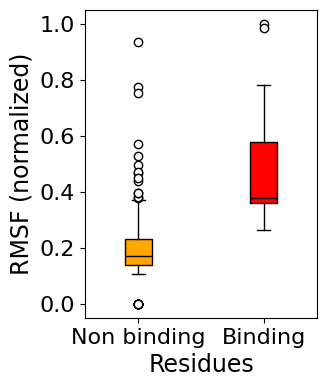

In [50]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))

plt.xlim([0.7,2.0])

plt.savefig("bp_large_gramd1c_rmsf.png",dpi=500,bbox_inches="tight")

In [51]:
prot='osh6'

filename='osh6_resnr36_betafactor_membranebinding_CA.pdb'
filename2='osh6_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

data = read_xvg("rmsf_osh6.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
# for i in range(6):
    # rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
for i in range(24):
    rmsf_asterc.append(0)  

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [52]:
bound = []
nbound = []
for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Wilcoxon Rank-Sum Statistic: 1186.0
P-value: 6.306435298136766e-08
Reject the null hypothesis: There is a significant difference between the groups.


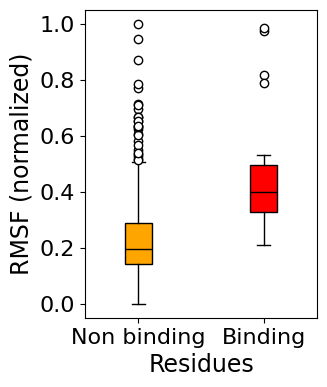

In [53]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))

plt.xlim([0.7,2.0])

plt.savefig("bp_large_osh6_rmsf.png",dpi=500,bbox_inches="tight")

In [54]:
prot='osh4'

filename='osh4_resnr1_betafactor_membranebinding_CA.pdb'
filename2='osh4_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

data = read_xvg("rmsf_osh4.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
# for i in range(6):
    # rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
# for i in range(24):
#     rmsf_asterc.append(0)  

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [55]:
bound = []
nbound = []
for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Wilcoxon Rank-Sum Statistic: 1897.0
P-value: 1.3465595677508578e-06
Reject the null hypothesis: There is a significant difference between the groups.


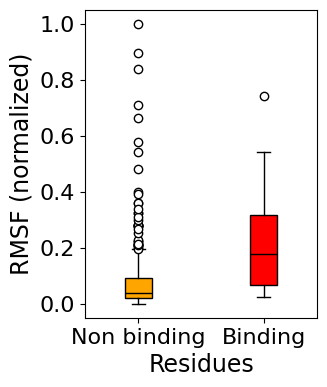

In [56]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))

plt.xlim([0.7,2.0])

plt.savefig("bp_large_osh4_rmsf.png",dpi=500,bbox_inches="tight")

In [57]:
prot='cptp'

filename='cptp_resnr1_betafactor_membranebinding_CA.pdb'
filename2='cptp_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

data = read_xvg("rmsf_cptp.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
for i in range(2):
    rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
for i in range(6):
    rmsf_asterc.append(0)  

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [58]:
bound = []
nbound = []
for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Wilcoxon Rank-Sum Statistic: 1116.5
P-value: 3.7302616766343635e-05
Reject the null hypothesis: There is a significant difference between the groups.


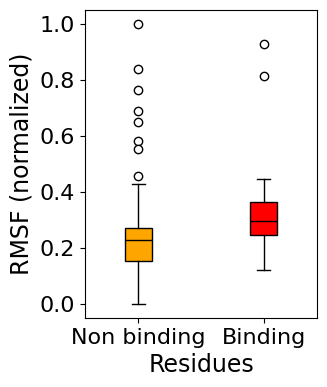

In [59]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))

plt.xlim([0.7,2.0])

plt.savefig("bp_large_cptp_rmsf.png",dpi=500,bbox_inches="tight")

In [60]:
prot='ttpa'

filename='ttpa_resnr25_betafactor_membranebinding_88to253_CA.pdb'
filename2='ttpa_apoholo_pc0_CA_88to253.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

data = read_xvg("rmsf_ttpa.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
# for i in range(2):
#     rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
for i in range(1):
    rmsf_asterc.append(0)  

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [61]:
bound = []
nbound = []
for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Wilcoxon Rank-Sum Statistic: 215.0
P-value: 2.404193271070545e-07
Reject the null hypothesis: There is a significant difference between the groups.


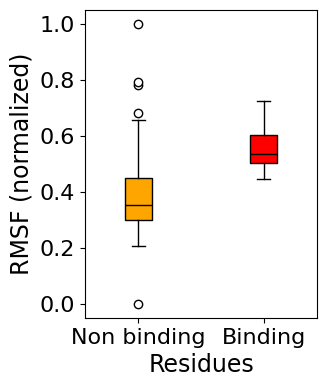

In [62]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))

plt.xlim([0.7,2.0])

plt.savefig("bp_large_ttpa_rmsf.png",dpi=500,bbox_inches="tight")

In [63]:
prot='sfh1'

filename='sfh1_resnr1_betafactor_membranebinding_CA.pdb'
filename2='sfh1_apoholo_pc0_CA_101to274.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

data = read_xvg("rmsf_sfh1.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
# for i in range(2):
#     rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
for i in range(1):
    rmsf_asterc.append(0)  

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [64]:
bound = []
nbound = []
for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Wilcoxon Rank-Sum Statistic: 2179.5
P-value: 0.5738425531343752
Fail to reject the null hypothesis: There is no significant difference between the groups.


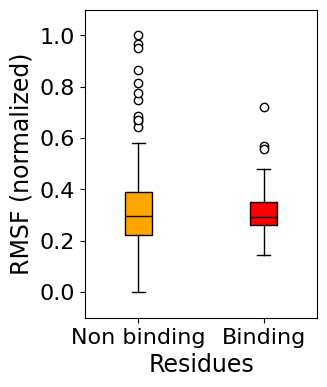

In [65]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))

plt.xlim([0.7,2.0])
plt.ylim([-0.1,1.1])

plt.savefig("bp_large_sfh1_rmsf.png",dpi=500,bbox_inches="tight")

In [66]:
prot='smp'

filename='esyt_180_resnr191_betafactor_membranebinding_CA_pymol.pdb'
filename2='esyt_180_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

data = read_xvg("rmsf_esyt.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
for i in range(1):
    rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
for i in range(3):
    rmsf_asterc.append(0)  

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [67]:
bound = []
nbound = []
for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Wilcoxon Rank-Sum Statistic: 571.5
P-value: 8.286660043271947e-06
Reject the null hypothesis: There is a significant difference between the groups.


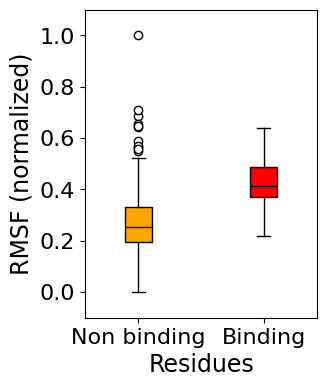

In [68]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))

plt.xlim([0.7,2.0])
plt.ylim([-0.1,1.1])

plt.savefig("bp_large_esyt_rmsf.png",dpi=500,bbox_inches="tight")

In [71]:
prot='fabp'

filename='fabp_resnr1_betafactor_membranebinding_CA.pdb'
filename2='fabp_apoholo_pc0_CA.pdb'


coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

data = read_xvg("rmsf_fabp.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
for i in range(4):
    rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
for i in range(2):
    rmsf_asterc.append(0)  

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [72]:
bound = []
nbound = []
for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Wilcoxon Rank-Sum Statistic: 491.0
P-value: 1.3222385042761111e-05
Reject the null hypothesis: There is a significant difference between the groups.


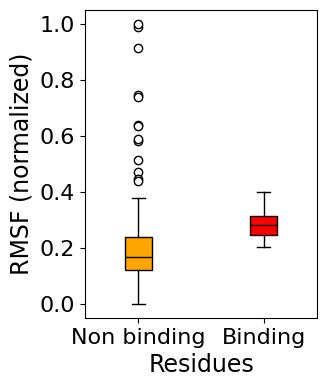

In [73]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))

plt.xlim([0.7,2.0])

plt.savefig("bp_large_fabp_large_rmsf.png",dpi=500,bbox_inches="tight")

In [74]:
prot='pitpa'

filename='pitpa_resnr1_betafactor_membranebinding_CA.pdb'
filename2='pitpa_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

data = read_xvg("rmsf_pitp.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
for i in range(3):
    rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
for i in range(12):
    rmsf_asterc.append(0)  

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [75]:
bound = []
nbound = []
for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Wilcoxon Rank-Sum Statistic: 388.0
P-value: 3.1373600439828045e-06
Reject the null hypothesis: There is a significant difference between the groups.


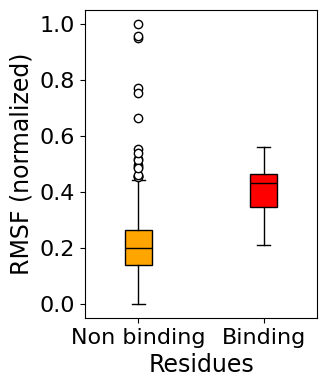

In [76]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))

plt.xlim([0.7,2.0])

plt.savefig("bp_large_pitpa_rmsf.png",dpi=500,bbox_inches="tight")

In [77]:
prot='gm2a'

filename='gm2a_resnr1_betafactor_membranebinding_CA.pdb'
filename2='gm2a_apo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

data = read_xvg("rmsf_gm2a.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
for i in range(3):
    rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
for i in range(3):
    rmsf_asterc.append(0) 

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [78]:
bound = []
nbound = []
for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Wilcoxon Rank-Sum Statistic: 367.0
P-value: 6.037138118634155e-06
Reject the null hypothesis: There is a significant difference between the groups.


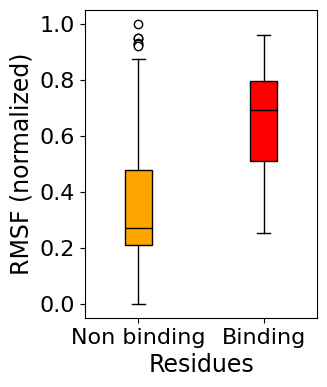

In [79]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))

plt.xlim([0.7,2.0])

plt.savefig("bp_large_gm2a_rmsf.png",dpi=500,bbox_inches="tight")

In [80]:
prot='lcn1'

filename='lcn1_resnr1_betafactor_membranebinding_CA.pdb'
filename2='lcn1_apo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

data = read_xvg("rmsf_lcn1.xvg")
r, rmsf = data[:,0], data[:,1]
rmsf_asterc = []
for i in range(2):
    rmsf_asterc.append(0)  
for i in rmsf:
    rmsf_asterc.append(i)
for i in range(5):
    rmsf_asterc.append(0)  

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)

scaled_r = NormalizeData(rmsf_asterc)

In [81]:
bound = []
nbound = []
for k, z in enumerate(scaled_z):
    if (z >= t):
        bound.append(scaled_r[k])
    else:
        nbound.append(scaled_r[k])

# Perform Wilcoxon Rank-Sum test
statistic, p_value = mannwhitneyu(nbound, bound)

# Print the results
print(f"Wilcoxon Rank-Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Wilcoxon Rank-Sum Statistic: 1083.0
P-value: 0.022519922499398288
Reject the null hypothesis: There is a significant difference between the groups.


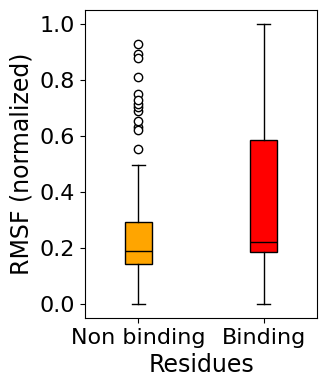

In [82]:
data = [nbound, bound]
# Create a boxplot
# Create a boxplot with custom colors
# Set the size of the plot
fig, ax = plt.subplots(figsize=(3, 4))

bp = plt.boxplot(data, labels=['Non binding', 'Binding'], patch_artist=True, widths=0.15, positions = [1, 1.7])

# Set custom colors for each box
colors = ['orange', 'red']
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', facecolor=color)

# Set custom colors for the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black')

# Set custom colors for the caps
for cap in bp['caps']:
    cap.set(color='black')

# Set custom colors for the fliers
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='white', markeredgecolor='black')

# Set custom colors for the median line
for median in bp['medians']:
    median.set(color='black')

# Add labels and title
plt.xlabel('Residues',fontsize=size)
plt.ylabel('RMSF (normalized)',fontsize=size)
plt.yticks(fontsize=(size-1))
plt.xticks(fontsize=(size-1))

plt.xlim([0.7,2.0])

plt.savefig("bp_large_lcn1_rmsf.png",dpi=500,bbox_inches="tight")